<a href="https://colab.research.google.com/github/mvmorr/CE888/blob/master/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
sampel = np.random.choice(data, (100,14))
np.percentile(sampel,95)


22.0

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
  samples = np.random.choice(sample, (n_iterations,sample_size))
  data_mean = np.mean(samples)
  new_sample = []
  for i in samples:
    new_sample.append(np.mean(i))
  lower = np.percentile(new_sample, 5)
  upper = np.percentile(new_sample,95)

  return data_mean, lower, upper

(0, 100000)

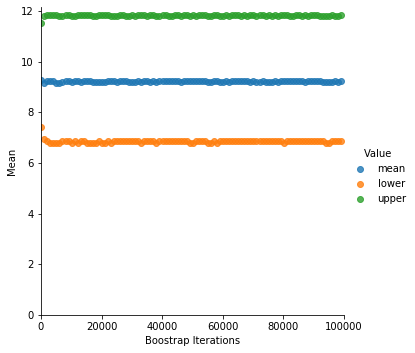

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:

def boostrap_mean_ci(sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
  samples = np.random.choice(sample, (iterations,sample_size))
  data_mean = np.mean(samples)
  new_sample = []
  for i in samples:
    new_sample.append(np.mean(i))
  lower = np.percentile(new_sample, (100-ci)/2)
  upper = np.percentile(new_sample,ci+((100-ci)/2))
  return data_mean, lower, upper

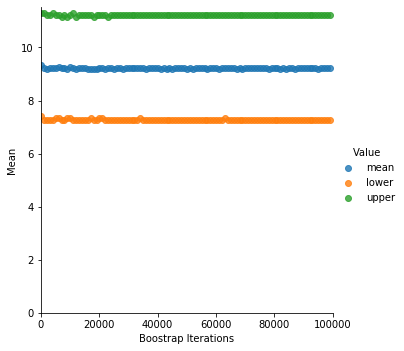

In [6]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

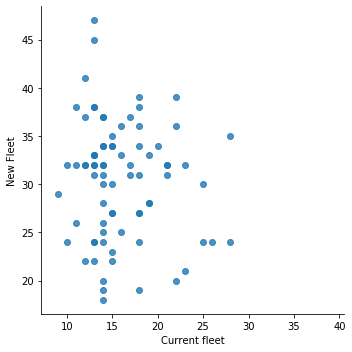

In [7]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
v_df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
vc_data = v_df[v_df.columns[0]].values
vn_data = v_df[v_df.columns[1]].values
vc_array = v_df.values.T[0]
vn_array = v_df.values.T[1]
sns.lmplot(v_df.columns[0], v_df.columns[1],data=v_df, fit_reg=False)


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


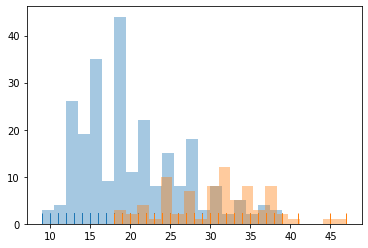

In [8]:
sns.distplot(vc_data, bins=20, kde=False, rug=True)
sns.distplot(vn_data, bins=20, kde=False, rug=True)


(0, 100000)

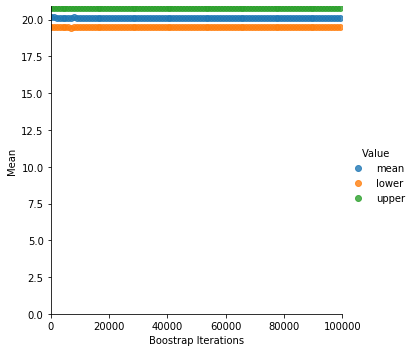

In [9]:
#Current Fleet
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(vc_array, vc_array.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

(0, 100000)

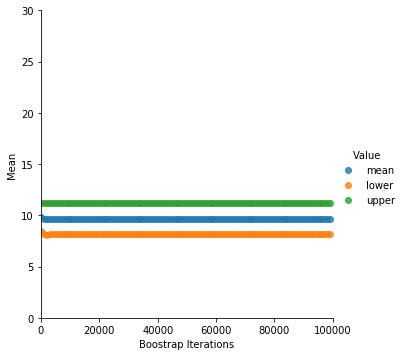

In [15]:
#New Fleet
vn_array = np.nan_to_num(vn_array)
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(vn_array, vn_array.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,30)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [17]:
vc_mean = np.mean(vc_array)
print("Mean Current",vc_mean)

Mean Current 20.14457831325301


In [18]:
vn_mean = np.mean(vn_array)
print("Mean New", vn_mean)

Mean New 9.670682730923694


In [35]:
#Permutation Testing
concat = np.concatenate((vc_array,np.nan_to_num(vn_array)))
concat

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15., 15., 14., 15.,
       14., 22., 18., 21., 21., 10., 10., 11.,  9., 28., 25., 19., 16.,
       17., 19., 18., 14., 14., 14., 14., 12., 13., 13., 18., 22., 19.,
       18., 23., 26., 25., 20., 21., 13., 14., 15., 14., 17., 11., 13.,
       12., 13., 15., 13., 13., 14., 22., 28., 13., 14., 13., 14., 15.,
       12., 13., 13., 14., 13., 12., 13., 18., 16., 18., 18., 23., 11.,
       12., 13., 12., 18., 21., 19., 21., 15., 16., 15., 11., 20., 21.,
       19., 15., 26., 25., 16., 16., 18., 16., 13., 14., 14., 14., 28.,
       19., 18., 15., 15., 16., 15., 16., 14., 17., 16., 15., 18., 21.,
       20., 13., 23., 20., 23., 18., 19., 25., 26., 18., 16., 16., 15.,
       22., 22., 24., 23., 29., 25., 20., 18., 19., 18., 27., 13., 17.,
       13., 13., 13., 30., 26., 18., 17., 16., 15., 18., 21., 19., 19.,
       16., 16., 16., 16., 25., 26., 31., 34., 36., 20., 19., 20., 19.,
       21., 20., 25., 21., 19., 21., 21., 19., 18., 19., 18., 18

In [36]:
perm = np.random.permutation(concat)
perm

array([ 0.,  0., 11., 24., 18., 19., 10., 26., 20., 30.,  0.,  0.,  0.,
        0., 24., 15., 21., 14., 21.,  0., 18., 18., 32., 18.,  0., 19.,
       26.,  0., 33., 14., 15., 12., 18.,  0., 38.,  0., 16., 18., 38.,
       33.,  0., 13.,  0., 38., 15., 31., 20., 13.,  0.,  0., 14.,  0.,
       13.,  0., 16., 22.,  0., 22.,  0., 32., 31., 34., 39., 13., 33.,
        0.,  0., 19., 32.,  0., 21., 18.,  0.,  0., 18., 16., 18., 23.,
       14.,  0., 18., 18., 15., 15.,  0.,  0., 32., 21.,  0., 30.,  0.,
        0., 29.,  0., 25., 19., 15.,  0., 18., 25.,  0., 18., 25.,  0.,
       29., 37., 13., 18., 21., 19.,  0.,  0., 13., 12.,  0.,  0., 31.,
        0., 25., 19., 22., 16.,  0.,  0., 27., 19., 34., 13.,  0.,  0.,
        0., 26., 32., 27., 19., 30., 33., 27., 11., 27., 35., 20., 12.,
       32., 18., 31., 32.,  0., 17.,  0., 16., 18., 13.,  0., 24.,  0.,
       18., 18., 15., 18., 45.,  0., 16., 26., 23.,  0., 24., 16., 13.,
        0., 32., 24., 24., 34., 34.,  0., 22., 16.,  0.,  0.,  0

In [37]:
pold = perm[:int(len(perm)/2)]
pold

array([ 0.,  0., 11., 24., 18., 19., 10., 26., 20., 30.,  0.,  0.,  0.,
        0., 24., 15., 21., 14., 21.,  0., 18., 18., 32., 18.,  0., 19.,
       26.,  0., 33., 14., 15., 12., 18.,  0., 38.,  0., 16., 18., 38.,
       33.,  0., 13.,  0., 38., 15., 31., 20., 13.,  0.,  0., 14.,  0.,
       13.,  0., 16., 22.,  0., 22.,  0., 32., 31., 34., 39., 13., 33.,
        0.,  0., 19., 32.,  0., 21., 18.,  0.,  0., 18., 16., 18., 23.,
       14.,  0., 18., 18., 15., 15.,  0.,  0., 32., 21.,  0., 30.,  0.,
        0., 29.,  0., 25., 19., 15.,  0., 18., 25.,  0., 18., 25.,  0.,
       29., 37., 13., 18., 21., 19.,  0.,  0., 13., 12.,  0.,  0., 31.,
        0., 25., 19., 22., 16.,  0.,  0., 27., 19., 34., 13.,  0.,  0.,
        0., 26., 32., 27., 19., 30., 33., 27., 11., 27., 35., 20., 12.,
       32., 18., 31., 32.,  0., 17.,  0., 16., 18., 13.,  0., 24.,  0.,
       18., 18., 15., 18., 45.,  0., 16., 26., 23.,  0., 24., 16., 13.,
        0., 32., 24., 24., 34., 34.,  0., 22., 16.,  0.,  0.,  0

In [39]:
pnew = perm[int(len(perm)/2):]
pnew

array([19., 37.,  0.,  0.,  0.,  0., 16.,  0., 17.,  0.,  0.,  0., 35.,
       28.,  0., 34.,  0., 22., 20., 15.,  0.,  0., 28., 36., 21., 28.,
       19.,  0., 28., 13., 10.,  9.,  0., 34., 21., 27.,  0., 41., 27.,
       13.,  0., 14., 21., 16., 11., 13.,  0., 34.,  0., 13., 13.,  0.,
       15., 35., 14.,  0., 26.,  0.,  0.,  0.,  0.,  0., 14., 30., 13.,
       31., 16., 17., 32.,  0.,  0., 17., 23., 28., 21.,  0.,  0., 36.,
       23., 32.,  0., 34., 28., 17., 20., 26.,  0., 18., 31., 17.,  0.,
        0., 25.,  0.,  0.,  0., 34., 23.,  0., 33., 19.,  0.,  0.,  0.,
        0.,  0., 32., 16., 24., 37., 27., 23.,  0., 20., 25.,  0.,  0.,
        0., 27., 15.,  0., 32.,  0., 27.,  0.,  0., 13.,  0., 25., 28.,
       47.,  0.,  0., 17., 34., 14., 24., 18., 14., 38.,  0., 20., 24.,
       16., 36.,  0., 15.,  0., 20.,  0.,  0., 21., 31.,  0., 23.,  0.,
       11.,  0., 20., 22.,  0.,  0., 14., 27., 15., 24.,  0., 18., 19.,
       21., 15., 28., 39., 15., 25., 12.,  0., 22.,  0., 31.,  0

In [0]:
def permutation_testing(con):
  ob = np.mean(vn_array)-np.mean(vc_array)
  count = 0
  for i in range(1,20000):
      per = np.random.permutation(con)
      pol = per[:int(len(per)/2)]
      pne = per[int(len(per)/2):]
      if (np.mean(pne)- np.mean(pol))>ob :
        count+=1
  print(count/20000)

In [54]:
permutation_testing(concat)

0.99995
